<center><h1>电影《流浪地球》的观众评价的数据分析</h1></center> 

<h2>1.分析目标</h2>

1.电影流浪地球中的各评分数量

2.高低分跟那些演员有关
 


<h2>2.分析内容</h2>

文件（data.csv）中包含“content”，“gender”，“id”，“nick”，“replyCount”，“score”，“time”等信息。首先读取全部信息去重；然后提前需要
的信息并进行去空处理；接着对提取的干净信息进行统计分析；最后生成相应的图。

<h2>3.分析步骤</h2>

   <h3>3.1 csv文件信息读取</h3>
读取文件信息并去重，保存成DataFrame格式；

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#设置中文标签的显示
plt.rcParams['font.sans-serif'] = ['SimHei']  #设置显示中文字体

In [170]:
#读取csv中的数据，以“;”作为分隔符来添加字段名
film_data = pd.read_csv('data.csv', delimiter=',', encoding='utf8')
film_data

,content,gender,id,nick,replyCount,score,time,upCount,userId,userLevel
0,很好震撼的很啊,1.0,1.056560e+09,江生,0.0,9.0,2019-02-11 10:10:00,0.0,2.016950e+08,3.0
1,国产的科幻巅峰，丝毫不逊色好莱坞科幻大片，影响力就像星球大战一样，是国产科幻的开山之做，希望...,0.0,1.056560e+09,Decadence,0.0,10.0,2019-02-11 10:10:00,0.0,1.020876e+09,4.0
2,超级好看啊 户口帅的一批 我自己一个人看的 看得热血沸腾啊 爷爷死的时候真的哭死了,2.0,1.056558e+09,暴走萝莉912,0.0,10.0,2019-02-11 10:10:00,0.0,3.042996e+08,3.0
3,保护生态环境，从我做,1.0,1.056558e+09,*^_^*红尘逍遥,0.0,10.0,2019-02-11 10:10:00,0.0,1.548123e+09,2.0
4,超级好看，感动，特效好哒,2.0,1.056560e+09,罗大大,0.0,9.0,2019-02-11 10:10:00,0.0,8.973641e+08,2.0
...,...,...,...,...,...,...,...,...,...,...
102579,终于明白什么叫饱和式救援\n人类命运共同体选择了希望\n不管走多远，也要带着哪怕是残破的家\n,1.0,1.054669e+09,ficeray,0.0,10.0,2019-02-11 01:40:00,0.0,2.455027e+09,1.0
102580,很不错，推荐大家看。,1.0,1.054664e+09,愛•菩提•翡翠,0.0,10.0,2019-02-11 01:40:00,0.0,2.297931e+09,1.0
102581,堪比好莱坞大片，震撼,1.0,1.054661e+09,Zz,0.0,10.0,2019-02-11 01:40:00,0.0,2.223646e+09,2.0
102582,非常好看 震撼人心,1.0,1.054669e+09,十八。,0.0,10.0,2019-02-11 01:40:00,0.0,2.458246e+09,1.0


<h3>3.2 数据清洗</h3>
提取信息并进行去空、规范化处理

In [4]:
#提取有效的列
dyxx = film_data.loc[:,['content','score','time']]
dyxx.head()

,content,score,time
0,很好震撼的很啊,9.0,2019-02-11 10:10:00
1,国产的科幻巅峰，丝毫不逊色好莱坞科幻大片，影响力就像星球大战一样，是国产科幻的开山之做，希望...,10.0,2019-02-11 10:10:00
2,超级好看啊 户口帅的一批 我自己一个人看的 看得热血沸腾啊 爷爷死的时候真的哭死了,10.0,2019-02-11 10:10:00
3,保护生态环境，从我做,10.0,2019-02-11 10:10:00
4,超级好看，感动，特效好哒,9.0,2019-02-11 10:10:00


In [5]:
#输出初始行数，通过比较理解去重操作
print('原始数据行数：', len(film_data))

原始数据行数： 102584


In [8]:
#去重
# film_data = film_data.drop_duplicates()
film_data = film_data.drop_duplicates().reset_index().drop('index',axis=1)

#输出去重后的行数
print('去重后数据行数：', len(film_data))

#查看去重后的数据
film_data

去重后数据行数： 102584


,content,gender,id,nick,replyCount,score,time,upCount,userId,userLevel
0,很好震撼的很啊,1.0,1.056560e+09,江生,0.0,9.0,2019-02-11 10:10:00,0.0,2.016950e+08,3.0
1,国产的科幻巅峰，丝毫不逊色好莱坞科幻大片，影响力就像星球大战一样，是国产科幻的开山之做，希望...,0.0,1.056560e+09,Decadence,0.0,10.0,2019-02-11 10:10:00,0.0,1.020876e+09,4.0
2,超级好看啊 户口帅的一批 我自己一个人看的 看得热血沸腾啊 爷爷死的时候真的哭死了,2.0,1.056558e+09,暴走萝莉912,0.0,10.0,2019-02-11 10:10:00,0.0,3.042996e+08,3.0
3,保护生态环境，从我做,1.0,1.056558e+09,*^_^*红尘逍遥,0.0,10.0,2019-02-11 10:10:00,0.0,1.548123e+09,2.0
4,超级好看，感动，特效好哒,2.0,1.056560e+09,罗大大,0.0,9.0,2019-02-11 10:10:00,0.0,8.973641e+08,2.0
...,...,...,...,...,...,...,...,...,...,...
102579,终于明白什么叫饱和式救援\n人类命运共同体选择了希望\n不管走多远，也要带着哪怕是残破的家\n,1.0,1.054669e+09,ficeray,0.0,10.0,2019-02-11 01:40:00,0.0,2.455027e+09,1.0
102580,很不错，推荐大家看。,1.0,1.054664e+09,愛•菩提•翡翠,0.0,10.0,2019-02-11 01:40:00,0.0,2.297931e+09,1.0
102581,堪比好莱坞大片，震撼,1.0,1.054661e+09,Zz,0.0,10.0,2019-02-11 01:40:00,0.0,2.223646e+09,2.0
102582,非常好看 震撼人心,1.0,1.054669e+09,十八。,0.0,10.0,2019-02-11 01:40:00,0.0,2.458246e+09,1.0


In [69]:
#提取需要的列并去空
film_data = film_data[['content','score','time']].dropna()
film_data.head()

,content,score,time
0,很好震撼的很啊,9.0,2019-02-11 10:10:00
1,国产的科幻巅峰，丝毫不逊色好莱坞科幻大片，影响力就像星球大战一样，是国产科幻的开山之做，希望...,10.0,2019-02-11 10:10:00
2,超级好看啊 户口帅的一批 我自己一个人看的 看得热血沸腾啊 爷爷死的时候真的哭死了,10.0,2019-02-11 10:10:00
3,保护生态环境，从我做,10.0,2019-02-11 10:10:00
4,超级好看，感动，特效好哒,9.0,2019-02-11 10:10:00


<h4>3.3.1对评分数量进行统计</h4>

In [180]:
film_type = film_data.groupby(film_data['score'])['time'].count().reset_index()
film_type

,score,time
0,0.0,130
1,1.0,2329
2,2.0,429
3,3.0,481
4,4.0,359
5,5.0,1549
6,6.0,1343
7,7.0,2478
8,8.0,5810
9,9.0,14427


In [71]:
#将“time”改为“小计”
film_type.rename(columns={'time':"小计"},inplace=True)
film_type

,score,小计
0,0.0,130
1,1.0,2329
2,2.0,429
3,3.0,481
4,4.0,359
5,5.0,1549
6,6.0,1343
7,7.0,2478
8,8.0,5810
9,9.0,14427


In [75]:
#将统计结果的Series格式转化为DataFrame，并按升序排列
film_ = film_type.reset_index().sort_values(by='score',ascending=True)
#在不指定任何参数的情况下使用reset_index（），则序列号将成为新索引，而原始索引将保留l为新列。
film_type = film_type.reset_index().drop('index',axis=1)
film_type

,level_0,score,小计
0,0,0.0,130
1,1,1.0,2329
2,2,2.0,429
3,3,3.0,481
4,4,4.0,359
5,5,5.0,1549
6,6,6.0,1343
7,7,7.0,2478
8,8,8.0,5810
9,9,9.0,14427


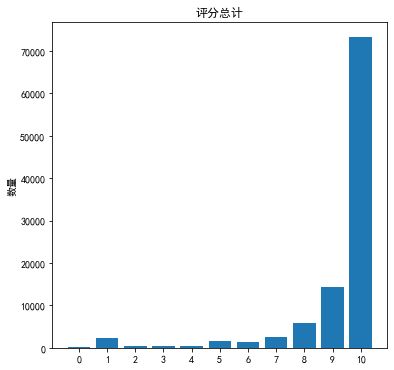

In [101]:
# 绘图-评分总计
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title('评分总计')
ax.set_ylabel('数量')
ax.set_xticks(film_type['score'])
ax.bar(film_type['score'],film_type['小计'])

plt.show()

<h4>3.3.2对各演职员总体提及次数进行统计</h4>

In [119]:
mapping = {'liucixin':'刘慈欣|大刘', 'guofan':'郭帆', 'quchuxiao':'屈楚萧|刘启|户口', 'wujing':'吴京|刘培强', 
           'liguangjie':'李光洁|王磊', 'wumengda':'吴孟达|达叔|韩子昂', 'zhaojinmai':'赵今麦|韩朵朵'}
for key, value in mapping.items():
    film_data[key] = film_data['content'].str.contains(value)

In [120]:
# 总体提及次数
staff_count = pd.Series({key: film_data.loc[film_data[key], 'score'].count() for key in mapping.keys()}).sort_values()
staff_count

liguangjie     171
guofan         272
zhaojinmai     377
wumengda       477
quchuxiao      833
liucixin      3122
wujing        5351
dtype: int64

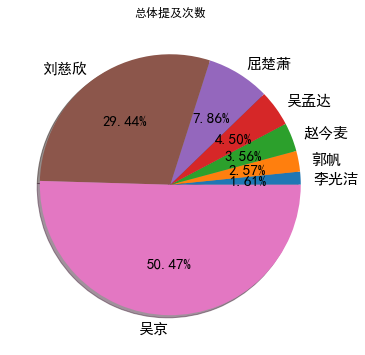

In [161]:
# 绘图-总体提及次数
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
x = ('李光洁', '郭帆', '赵今麦', '吴孟达', '屈楚萧', '刘慈欣', '吴京')
ax.set_title('总体提及次数')
ax.pie(staff_count.values,labels=x,textprops={'fontsize':15,'color':'black'}, autopct="%1.2f%%", shadow=True)

plt.show()

<h4>3.3.3对各演职员平均分进行统计</h4>

In [137]:
#《流浪地球》演职员平均分
average_score = pd.Series({key: film_data.loc[film_data[key], 'score'].mean() for key in mapping.keys()}).sort_values()
average_score

zhaojinmai    8.636605
wumengda      8.779874
wujing        9.003738
quchuxiao     9.018007
liguangjie    9.134503
liucixin      9.480782
guofan        9.658088
dtype: float64

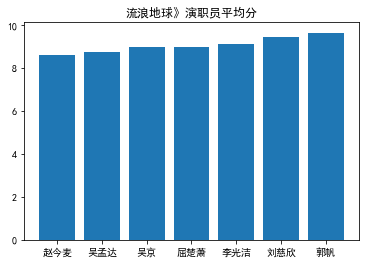

In [150]:
# 绘图-流浪地球》演职员平均分
y = ('赵今麦', '吴孟达', '吴京', '屈楚萧', '李光洁', '刘慈欣', '郭帆')
plt.bar(y, average_score.values)

 
plt.show()

<h4>3.3.4对各演职员低分提及百分比进行统计</h4>

In [139]:
#各演职员低分评论中被提及次数
staff_count_low = pd.Series({key: film_data.loc[film_data[key]&(film_data['score']<5), 'score'].count() for key in mapping.keys()}).sort_values()
staff_count_low

guofan          3
liguangjie      4
zhaojinmai     14
wumengda       29
quchuxiao      30
liucixin       36
wujing        305
dtype: int64

In [152]:
#各演职员低分提及百分比
staff_count_pct = np.round(staff_count_low/staff_count*100, 2).sort_values()
staff_count_pct

guofan        1.10
liucixin      1.15
liguangjie    2.34
quchuxiao     3.60
zhaojinmai    3.71
wujing        5.70
wumengda      6.08
dtype: float64

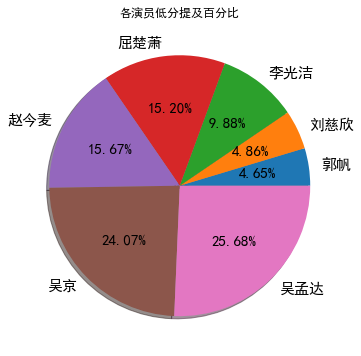

In [160]:
# 绘图-各演员低分提及百分比
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
z=('郭帆', '刘慈欣', '李光洁', '屈楚萧', '赵今麦', '吴京', '吴孟达')
ax.set_title('各演员低分提及百分比')
ax.pie(staff_count_pct.values,labels=z,textprops={'fontsize':15,'color':'black'}, autopct="%1.2f%%", shadow=True)

plt.show()

<h2>4.总体分析</h2>

1.评分中明显10分9分占绝大多数，低分很少

2.演职员郭帆，刘慈欣平均分较高，赵今麦，吴孟达较低。低分低级百分比吴孟达和吴京最高，
所以高分与郭帆刘慈欣有关，低分与吴孟达吴京有关